<a href="https://colab.research.google.com/github/smarulandas/samuel-Marualanda/blob/main/Repaso_De_Operaciones_de_se%C3%B1ales_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones básicas sobre señales

Las operaciones como la superposición, el cambio temporal y el escalamiento, se utilizan para construir señales con una estructura más compleja.

Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de señales.

### Superposición

La superposición $x(t)$ de dos señales $x_1(t)$ and $x_2(t)$ está dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo**

El siguiente ejemplo ilustra la superposición de dos señales armónicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

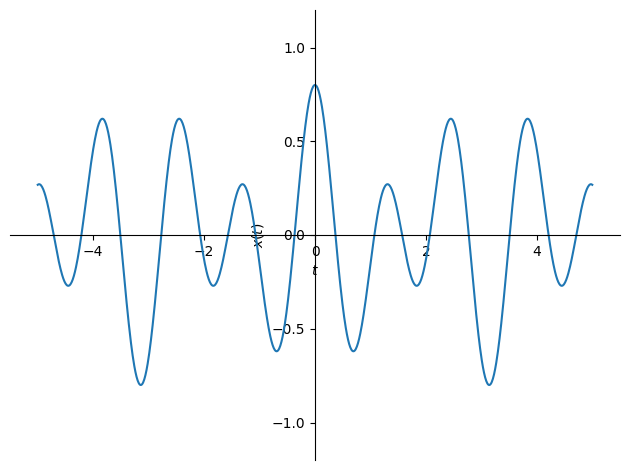

In [2]:
%matplotlib inline
import sympy as sym

t = sym.symbols('t', real=True)#se declara la variable simbólica t

#parámetros de las funciones cos
A = .3 #--> Amplitud 1
om1 = 3
B = .5 # --> Amplitud 2


#¿Por qué hay dos amplitudes? Hay dos porque en la ecuación dieron dos cosenos y cada coseno tiene una amplitud y (w=omega), cada amplitud es A Y B.

om2 = 5

#operación superposición en sympy
x = A*sym.cos(om1*t) + B*sym.cos(om2*t) #Es de esta forma porque asi nos dieron la señal o la ecuación.

#se grafica la señal resultante
sym.plot(x, (t,-5,5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Desplazamiento temporal

El desplazamiento temporal de una señal $s(t)$ en un instante de tiempo $\tau$ es una operación frecuentemente aplicada en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor.

El desplazamiento de la señal $x(t)$ está definido como:

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

con $\tau \in \mathbb{R}$. La señal $s(t)$ es:

* desplazada hacia la derecha (*retrasada*) para $\tau > 0$
* desplazada hacia la izquierda para $\tau < 0$

**Ejemplo**

Para ilustrar el cambio temporal de señales, la construcción de una señal escalera por una superposición de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



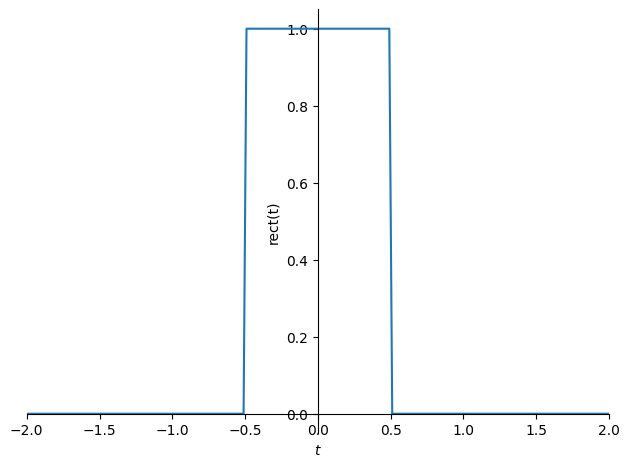

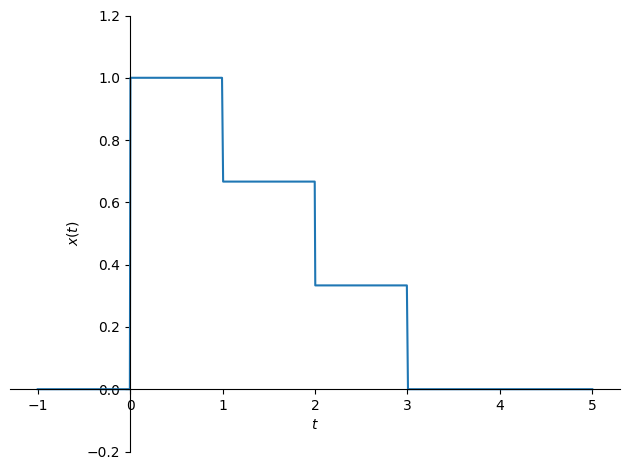

In [3]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)  #Heaviside es la funcion pulso, la cual es que se activa en un uno y esta apagada en cero.

#NOTA : Para desplazar hacia la derecha depende del signo de (τ) por lo cual debe ser (Positivo) para desplazar hacia la derecha y para desplazar hacia la izquierda debe dar (-τ).

#Para este caso (t + 0.5)-> el +0.5 es positivo porque (-τ) y el mensos multiplica al menos de la fucncion.

sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Ejercicio**

* Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.

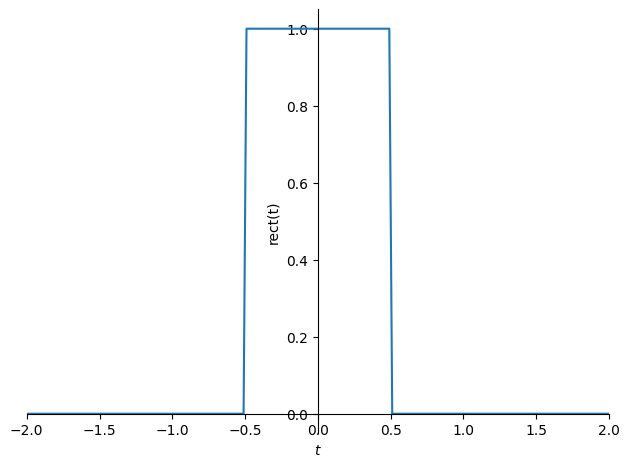

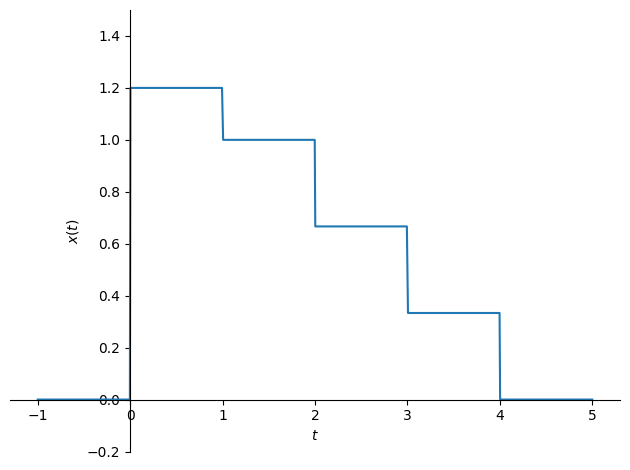

In [4]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)  #Heaviside es la funcion pulso, la cual es que se activa en un uno y esta apagada en cero.

sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')

#los rect desplazados se acoplan con escalamientos diferentes
x = (6/5)*rect.subs(t, t-1/2) + rect.subs(t, t-3/2) + 2/3*rect.subs(t, t-5/2) + 1/3*rect.subs(t, t-7/2)   # El valor de las rect es la amplitud de cada escalon.

#rect.subs -> Para graficar recta
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.5], ylabel='$x(t)$');

### Escalamiento temporal

El escalamiento temporal de una señal $s(t)$ está definido como:

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $s(t)$ es

* estirada para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

Una aplicación de escalado temporal en el procesamiento de la señal es la escala de las señales estándar y el modelado del [efecto Doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo**

El siguiente ejemplo ilustra el escalamiento de una señal escalera $y(t) = x(a \cdot t)$.

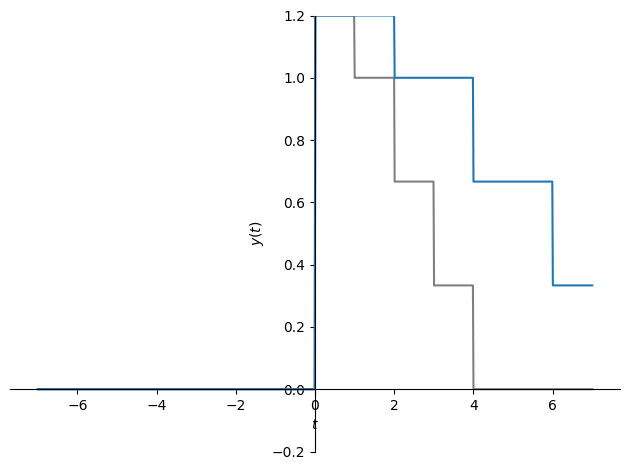

In [5]:
a = sym.symbols('a', real=True) #El real significa que se va a trabajar con los numeros reales.

y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray') #En (t,-7,7) significa que t toma los valores de -7 y 7.
                   #El valor de x, equivale al valor anterior en forma de escalera que se hizo en el ejercicio anterior.

py = sym.plot(y.subs(a,1/2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
            #El subs(a,1/2)-> El subs se usa para sustituir o reemplazar
            #(a,1/2) a = 1/2 en la funcion y en el codigo y.

px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()


**Ejercicio**

* Modifique el ejemplo anterior para que la señal se comprima.
* Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala `a`da como resultado un       estiramiento/compresión en este contexto?  


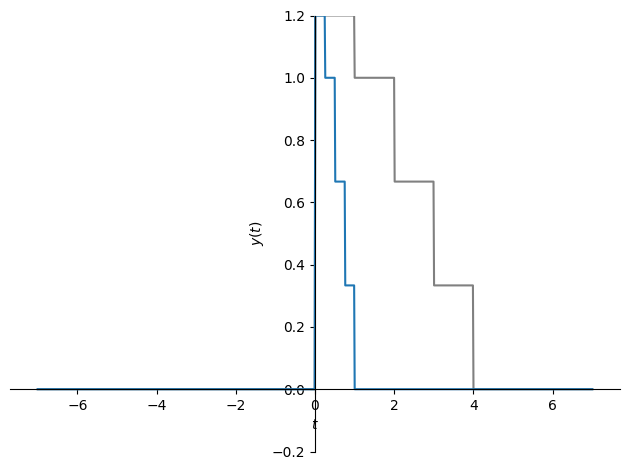

In [6]:
a = sym.symbols('a', real=True) #EL real significa que se va a trabajar con los numeros reales.

y = x.subs(t, a*t) #Para que "a" se comprima tiene que ser a > 1

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray') #En (t,-7,7) significa que t toma los valores de -7 y 7.

#A continuacion se va a cambiar a > 1, en y.subs, para reemplazar en la funcion y.
py = sym.plot(y.subs(a,4), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)

px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

### Desplazamiento Temporal

El desplazamiento temporal de una señal $s(t)$ está definido como

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

para $\tau \in \mathbb{R}$. Como $s(\tau - t) = s(- (t - \tau))$ la operación espejo también se puede representar como una inversión temporal de la señal $s(t)$ seguida por un desplazamiento de $\tau$ de la señal invertida. Para $\tau = 0$ este resultado es solo una inversión temporal de la señal.

La operación de cambio temporal puede interpretarse geométricamente como un reflejo de la señal $s(t)$ en el eje vertical $t=\frac{\tau}{2}$.

**Ejemplo**

El siguiente ejemplo ilustra el cambio temporal $y(t) = x(\tau - t)$ de la señal escalera $x(t)$ anteriormente introducida.

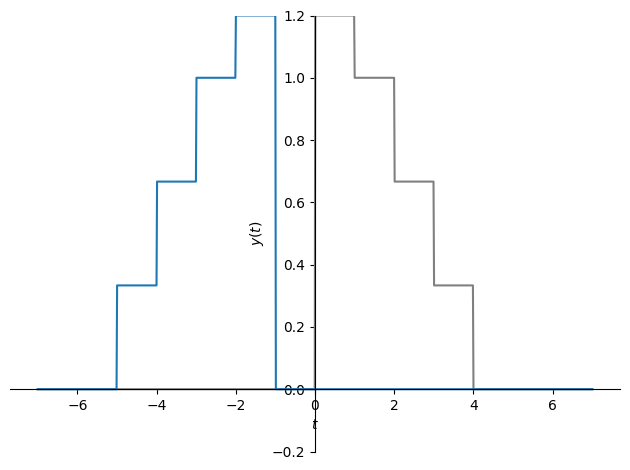

In [7]:
tau =-1
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¿la señal comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

El valor de tau para que la señal comience en t=0, sabiendo que la señal x se enciende en t=0, sería tau=1/2

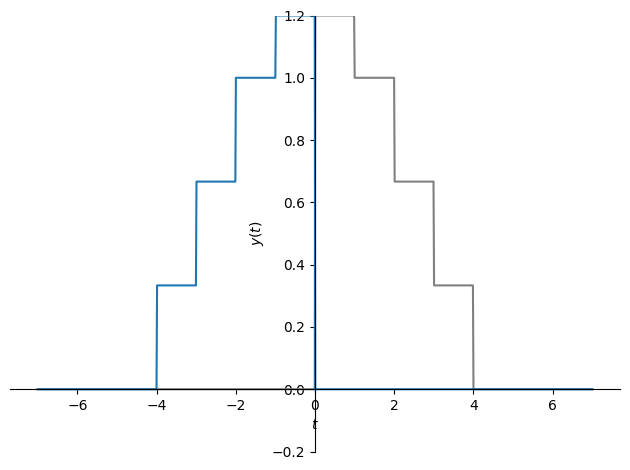

In [8]:
tau=0 #Le doy el valor de tau = 0
y=x.subs(t,tau-t) #sustituyo t por tau-t y almaceno la señal en la variable y
px=sym.plot(x,(t,-7,7),ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color="gray") #defino px como la gráfica original, en un intervalo de tiempo de -7 a 7, limite en eje y de -0.2 a 1.2,de color gris y con el show=False, impido que se muestre
py=sym.plot(y.subs(a,-2),(t,-7,7),ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False) #defino px como la gráfica comprimida, se sustituye a=2, en un intervalo de tiempo de -7 a 7, limite en eje y de -0.2 a 1.2, con el show=False, impido que se muestre
px.extend(py) # agregar todos los elementos del gráfico py al final del gráfico px. Así conectando los dos gráficos en un solo gráfico
px.show() #método que me muestra los gráficos

Vamos a realizar el cambio temporal dividiendo la operación en 2 consecutivas.

i) Inversión temporal= vamos a multiplicar t por -1

ii) Desplazamiento temporal= vamos a sumarle un tau

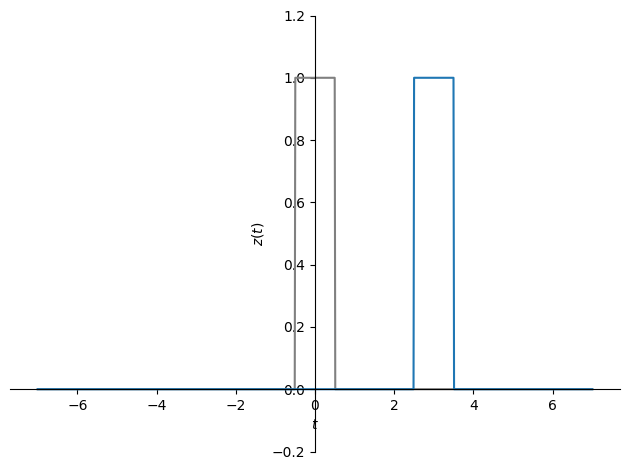

In [9]:
tau=3 #defino tau=3
x=rect #defino x como una señal rectangular
y= x.subs(t,-t) #sustituyo donde esta t por -t y almaceno la señal en la variable x. Aquí se hizo la inversión temporal
z=y.subs(-t,-t+tau) #sustituyo donde esta -t por -t + tau y almaceno la señal en la variable z. Aquí se hizo el desplazamiento temporal
px=sym.plot(x,(t,-7,7),ylim=[-0.2,1.2],ylabel=r"$z(t)$",show=False,line_color="gray") #defino px como la gráfica de la señal x, en un intervalo de tiempo de -7 a 7, con limites en el eje vertical de -0.2 a 1.2, establezco show=False para no mostrarla automaticamente y le doy el color gris
pz=sym.plot(z,(t,-7,7),ylim=[-0.2,1.2],ylabel=r"$z(t)$",show=False) #defino py como la gráfica de la señal z, en un intervalo de tiempo de -7 a 7, con limites en el eje vertical de -0.2 a 1.2, establezco show=False para no mostrarla automaticamente
px.extend(pz) #agrego todos los elementos del gráfico pz a px, asi juntando los dos gráficos en uno solo
px.show() #método para que me muestre el gráfico px

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.